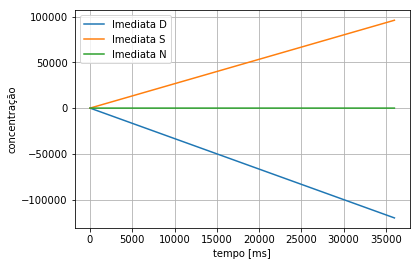

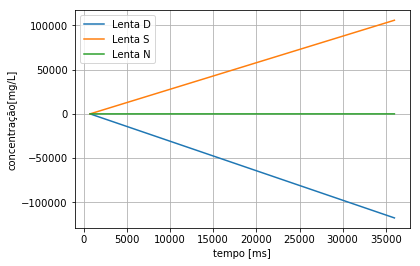

In [31]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
dt=0.1                              #Intervalo de tempo
#Concentrações iniciais

D=10
S=0
N=0
ld=3
ls=5

tempo=np.arange(0,36000,dt)  #tempo dps q a droga lenta começar a fazer efeito
Z0 = [D,S,N] #condição inicial

#Parâmetros
#Imediata

elimDI = 0.2   #taxa de eliminação da droga imediata no Sis Digestivo
elimSI = 0.25   #taxa de eliminação da droga imediata no Sis Sanguíneo
elimNI = 0.01   #taxa de eliminação da droga imediata no Sis Nervoso
tadi=0.8
tasi=0.75
tuni=0.99

#lenta

elimDL = 0.1   #taxa de eliminação da droga lenta no Sis Digestivo
elimSL = 0.25   #taxa de eliminação da droga lenta no Sis Sanguíneo
elimNL = 0.1   #taxa de eliminação da droga lenta no Sis Nervoso
tadl=0.9  #taxa de absorção da parede intestinbl
tasl=0.75  #taxa de absorção no sangue para o sistema nervoso
tunl=0.9  #taxa de uso nervoso, quanto o sis. nervoso vai utilisar a cada intervblo de tempo


def concentracaoL(Z,tempo):
    D=Z0[0]
    S=Z0[1]
    N=Z0[2]
    dDdt= - D/ld * elimDL - D/ld * tadl
    dSdt= D/ld * tadl - elimSL * S/ls - tasl * S/ls
    dNdt= S/ls * tasl - (tunl * N) - elimNL * N
    return (dDdt,dSdt,dNdt)

def concentracaoI(Z,tempo):
    D=Z0[0]
    S=Z0[1]
    N=Z0[2]
    dDdt= - D/ld * elimDI - D/ld * tadi
    dSdt= D/ld * tadi - elimSI * S/ls - tasi * S/ls
    dNdt= S/ls * tasi - tuni * N - elimNI * N
    return (dDdt,dSdt,dNdt)

L=odeint(concentracaoL,Z0,tempo[7200:,])
I=odeint(concentracaoI,Z0,tempo)

plt.plot(tempo,I[:,0],label="Imediata D")
plt.plot(tempo,I[:,1],label="Imediata S")
plt.plot(tempo,I[:,2],label="Imediata N")
plt.grid(True)
plt.ylabel('concentração')
plt.xlabel('tempo [ms]')
plt.legend()
plt.show()

plt.plot(tempo[7200:,],L[:,0],label="Lenta D")
plt.plot(tempo[7200:,],L[:,1],label="Lenta S")
plt.plot(tempo[7200:,],L[:,2],label="Lenta N")
plt.grid(True)
plt.ylabel('concentração[mg/L]')
plt.xlabel('tempo [ms]')
plt.legend()
plt.show()